In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop,Adam
import pandas as pd
import numpy as np

In [2]:
file_path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [3]:
df.replace("?", np.nan, inplace = True)
avg_bedrooms = df['bedrooms'].astype('float').mean(axis=0)
df['bedrooms'].replace(np.nan, round(avg_bedrooms), inplace=True)
avg_bathrooms= df['bathrooms'].astype('float').mean(axis=0)
df['bathrooms'].replace(np.nan, round(avg_bathrooms), inplace=True)

In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372646,2.115683,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926423,0.768822,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df.shape

(21613, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  float64
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

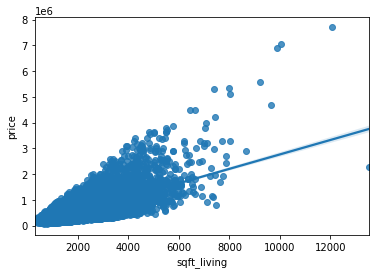

In [9]:
import seaborn as sns
ax=sns.regplot(x='sqft_living',y='price',data=df)

In [87]:
from sklearn.model_selection import train_test_split
x=df[['bedrooms','bathrooms','sqft_living','sqft_lot','grade']]
y=df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

In [88]:
model=keras.Sequential([keras.layers.Dense(1,input_shape=[5,])])

In [89]:
model.compile(optimizer=Adam(0.1),loss='mean_squared_error')
history=model.fit(x_train,y_train,validation_split=0.20,epochs=20)

Epoch 1/20
460/460 [==============================] - 0s 1ms/step - loss: 339725025280.0000 - val_loss: 270176681984.0000
Epoch 2/20
460/460 [==============================] - 0s 932us/step - loss: 256636420096.0000 - val_loss: 203634245632.0000
Epoch 3/20
460/460 [==============================] - 0s 927us/step - loss: 196079665152.0000 - val_loss: 153556992000.0000
Epoch 4/20
460/460 [==============================] - 0s 851us/step - loss: 150110945280.0000 - val_loss: 118113452032.0000
Epoch 5/20
460/460 [==============================] - 0s 910us/step - loss: 117873623040.0000 - val_loss: 93357563904.0000
Epoch 6/20
460/460 [==============================] - 0s 895us/step - loss: 96453976064.0000 - val_loss: 77939630080.0000
Epoch 7/20
460/460 [==============================] - 0s 859us/step - loss: 83056812032.0000 - val_loss: 69105901568.0000
Epoch 8/20
460/460 [==============================] - 0s 893us/step - loss: 75531493376.0000 - val_loss: 64562884608.0000
Epoch 9/20
460/46

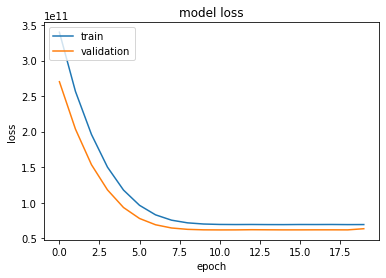

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [91]:
print(model.predict([[3.0,1.00,1180,5650,7]]))

[[317496.53]]


In [92]:
#coefficients of the model
print('Coefficients: \n',model.get_weights())

Coefficients: 
 [array([[163.1889    ],
       [247.71024   ],
       [263.6436    ],
       [  0.60310745],
       [291.0553    ]], dtype=float32), array([214.8819], dtype=float32)]


In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

-0.13974825323147844
175811.55865399443
74762085846.22884


Text(0, 0.5, 'Y Predicted')

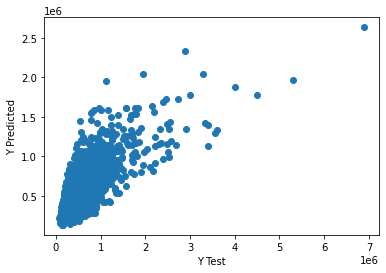

In [94]:
import matplotlib.pyplot as plt
#scatterplot of the Y test versus the Y predicted values
plt.scatter(y_test,y_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')